Tutorial
================




Quickstart
-------------

Here is how to fit a simple likelihood function:

In [1]:
paramnames = ['Hinz', 'Kunz']

def loglike(z):
    return -0.5 * (((z - 0.5) / 0.01)**2).sum()

def transform(x):
    return 10. * x - 5.

from autoemcee import ReactiveAffineInvariantSampler

sampler = ReactiveAffineInvariantSampler(paramnames, loglike, transform)

results = sampler.run()

[autoemcee] finding starting points and running initial 100 MCMC steps


100%|██████████| 100/100 [00:00<00:00, 836.45it/s]


[autoemcee] converged!!!


This gave us error estimates and even logZ!

In [2]:
print("Loglikelihood was called %d times." % sampler.results['ncall'])

Loglikelihood was called 80400 times.


Visualisation
--------------------

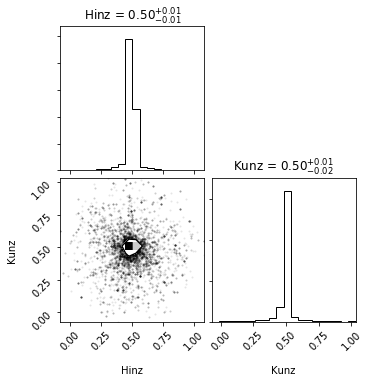

In [3]:
import corner
corner.corner(sampler.results['samples'], labels=paramnames, show_titles=True);

Advanced usage
-----------------------

Lets try a function that cannot be described by a simple gaussian.

In [4]:

paramnames = ['Hinz', 'Kunz'] #, 'Fuchs', 'Gans', 'Hofer']

def loglike_rosen(theta):
    a = theta[:-1]
    b = theta[1:]
    return -2 * (100 * (b - a**2)**2 + (1 - a)**2).sum()

def transform_rosen(u):
    return u * 20 - 10

import logging
logging.getLogger('autoemcee').setLevel(logging.DEBUG)

sampler = ReactiveAffineInvariantSampler(paramnames, loglike_rosen, transform=transform_rosen)
result = sampler.run(max_ncalls=1000000)


[autoemcee] finding starting points and running initial 100 MCMC steps


INFO:autoemcee:finding starting points and running initial 100 MCMC steps
DEBUG:autoemcee:global sampling for starting point ...
100%|██████████| 100/100 [00:00<00:00, 467.38it/s]
DEBUG:autoemcee:global sampling for starting point ...
100%|██████████| 100/100 [00:00<00:00, 514.52it/s]
DEBUG:autoemcee:global sampling for starting point ...
100%|██████████| 100/100 [00:00<00:00, 640.09it/s]
DEBUG:autoemcee:global sampling for starting point ...
100%|██████████| 100/100 [00:00<00:00, 634.67it/s]
DEBUG:autoemcee:checking convergence (iteration 1) ...
DEBUG:autoemcee:acceptance rates: [ 0.  2.  6.  7.  8.  8. 10. 10.] (worst few)
DEBUG:autoemcee:acceptance rates: [6. 6. 7. 7. 7. 8. 9. 9.] (worst few)
DEBUG:autoemcee:acceptance rates: [1. 4. 4. 5. 6. 6. 7. 8.] (worst few)
DEBUG:autoemcee:acceptance rates: [ 5.  5.  6.  7.  8.  9.  9. 10.] (worst few)
DEBUG:autoemcee:rhat chain diagnostic: [1.01293459 1.00974481] (<1.2 is good)


[autoemcee] converged!!!


INFO:autoemcee:converged!!!


This already took quite a bit more effort.

In [5]:
print("Loglikelihood was called %d times." % sampler.results['ncall'])

Loglikelihood was called 80400 times.


Lets see how well it did:

In [6]:
from getdist import MCSamples, plots
import matplotlib.pyplot as plt

samples_g = MCSamples(samples=sampler.results['samples'],
                       names=sampler.results['paramnames'],
                       label='Gaussian',
                       settings=dict(smooth_scale_2D=3))

mcsamples = [samples_g]


Removed no burn in


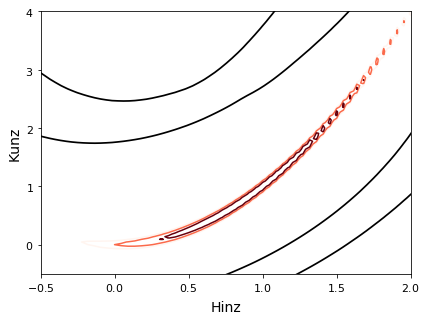

In [7]:
import numpy as np
x = np.linspace(-0.5, 4, 100)
a, b = np.meshgrid(x, x)
z = -2 * (100 * (b - a**2)**2 + (1 - a)**2)

g = plots.get_single_plotter()
g.plot_2d(mcsamples, paramnames)
plt.contour(a, b, z, [-3, -2, -1], cmap='Reds')
plt.xlim(-0.5, 2)
plt.ylim(-0.5, 4);

As you can see, the importance sampler was not able to perfectly follow the rosenbrock curvature. But it is a good start to roughly understand the uncertainties!

Removed no burn in


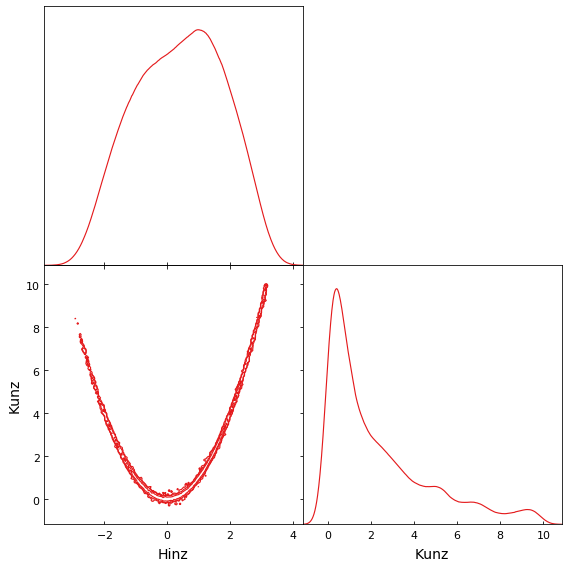

In [8]:
from getdist import MCSamples, plots
import matplotlib.pyplot as plt

samples_g = MCSamples(samples=sampler.results['samples'],
                       names=sampler.results['paramnames'],
                       label='Gaussian')

mcsamples = [samples_g]

g = plots.get_subplot_plotter(width_inch=8)
g.settings.num_plot_contours = 3
g.triangle_plot(mcsamples, filled=False, contour_colors=plt.cm.Set1.colors)

#corner.corner(sampler.results['samples'], labels=sampler.results['paramnames'], show_titles=True);